<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/hands-on-computer-vision-with-detectron2/01-detectron2-models/04_panoptic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Panoptic segmentation

Panoptic literally means “everything visible in the image.” In other words, it can be viewed as a combination
of common computer vision tasks such as instance segmentation and semantic segmentation. It helps
to show the unified and global view of segmentation.

Generally, it classifies objects in an image into
foreground objects (that have proper geometries) and background objects (that do not have appropriate
geometries but are textures or materials).

Let's develop an panoptic segmentation application using Detectron2 pre-trained models.

##Setup

In [ ]:
!python -m pip install "git+https://github.com/facebookresearch/detectron2.git"

In [2]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import cv2
from google.colab.patches import cv2_imshow

# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
print(detectron2.__version__)

0.6


In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

##Pre-trained model

In [8]:
# Select a model
config_file_path = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
score_thresh_test = 0.95

# Create a configuration file
config = get_cfg()
config_file = model_zoo.get_config_file(config_file_path)
config.merge_from_file(config_file)

# Download weights
config.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(config)

##Performing inferences

In [9]:
img = cv2.imread("input.jpg")
output = predictor(img)
print(output)

{'sem_seg': tensor([[[ 1.9076,  1.9127,  1.9549,  ...,  2.8527,  2.7006,  2.5891],
         [ 1.9207,  1.9262,  1.9720,  ...,  2.8809,  2.7275,  2.6168],
         [ 2.0297,  2.0388,  2.1149,  ...,  3.1163,  2.9521,  2.8470],
         ...,
         [ 1.5271,  1.5295,  1.5490,  ...,  0.7355,  0.6508,  0.5826],
         [ 1.6189,  1.6183,  1.6137,  ...,  0.6889,  0.6208,  0.5542],
         [ 1.6299,  1.6290,  1.6215,  ...,  0.6833,  0.6172,  0.5508]],

        [[-0.5089, -0.5082, -0.5022,  ...,  0.1744,  0.0574, -0.0529],
         [-0.5071, -0.5063, -0.4993,  ...,  0.1840,  0.0667, -0.0439],
         [-0.4919, -0.4901, -0.4750,  ...,  0.2643,  0.1438,  0.0310],
         ...,
         [-1.9926, -1.9977, -2.0399,  ..., -2.3555, -2.3486, -2.3030],
         [-1.9268, -1.9324, -1.9791,  ..., -2.3512, -2.3450, -2.2979],
         [-1.9189, -1.9246, -1.9718,  ..., -2.3507, -2.3446, -2.2973]],

        [[-2.3787, -2.3790, -2.3821,  ..., -2.4682, -2.4532, -2.4558],
         [-2.3741, -2.3745, -2.37

##Visualizing the results

In [10]:
output["panoptic_seg"][0].shape

torch.Size([720, 960])

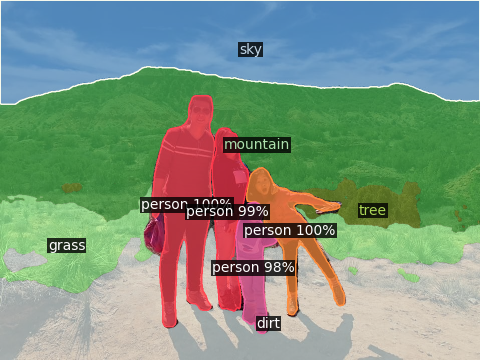

In [13]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
panoptic_seg, segments_info = output["panoptic_seg"]
annotated_img = visualizer.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)  # annotate the predicted instances to the image
cv2_imshow(annotated_img.get_image()[:, :, ::-1])

In [ ]:
img = cv2.imread("img2.jpeg")
output = predictor(img)

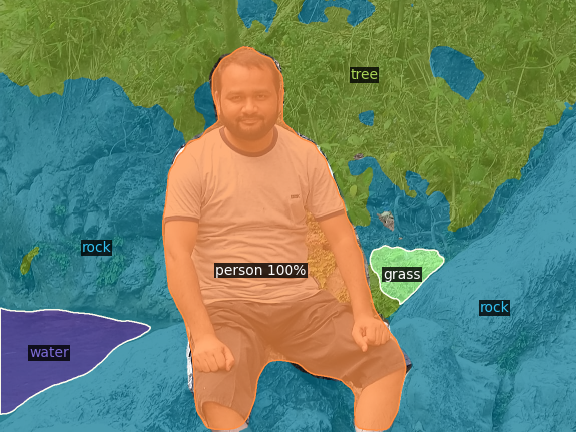

In [16]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
panoptic_seg, segments_info = output["panoptic_seg"]
annotated_img = visualizer.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)  # annotate the predicted instances to the image
cv2_imshow(annotated_img.get_image()[:, :, ::-1])